In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
sys.path.insert(1,'/pd/maya/domino/domino')

### Mimic Slice Eval

In [50]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs
pd.set_option('display.max_rows', 1000)


In [99]:
#setting_dp =run_sdms.out(18285).load() #CLIP
setting_dp = run_sdms.out(20871).load() #MULTIMODAL
setting_dp
#dp, _ = run_sdm.out(18287)
#dp.load()
#np.array(dp.load()['pred_slices'])
#dp, _ = run_sdm.out(run_id=row["run_sdm_run_id"])
#metrics_df = compute_sdm_metrics(dp.load())


,score_model_run_id (NumpyArrayColumn),setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn),run_sdm_run_id (PandasSeriesColumn),time_this_iter_s (PandasSeriesColumn),done (PandasSeriesColumn),timesteps_total (PandasSeriesColumn),episodes_total (PandasSeriesColumn),training_iteration (PandasSeriesColumn),experiment_id (PandasSeriesColumn),date (PandasSeriesColumn),timestamp (PandasSeriesColumn),time_total_s (PandasSeriesColumn),pid (PandasSeriesColumn),hostname (PandasSeriesColumn),node_ip (PandasSeriesColumn),time_since_restore (PandasSeriesColumn),timesteps_since_restore (PandasSeriesColumn),iterations_since_restore (PandasSeriesColumn),trial_id (PandasSeriesColumn),sdm_config/weight_y_log_likelihood (PandasSeriesColumn),sdm_config/n_slices (PandasSeriesColumn),sdm_config/emb (PandasSeriesColumn),config/sdm (PandasSeriesColumn),config/slice (PandasSeriesColumn),logdir (PandasSeriesColumn),sdm_class (PandasSeriesColumn)
0,20593.0,8edcacbf-8c2b-4859-aeec-f057989e4cb3,20593.0,20870.0,True,0,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,20878.0,12.210354,False,NaN,NaN,1.0,7542bd531986479f8f25bd4197838ccb,2021-09-25_06-20-18,1.632551e+09,12.210354,71038.0,pod-maya,10.92.7.3,12.210354,0.0,1.0,8d024_00000,1.0,5.0,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['mimic_multimodal', 'emb'], 'n_slices': 5, 'weight_y_log_likelihood': 1}}","{'alpha': 0.0, 'build_setting_kwargs': {'corr': 0.0, 'correlate': 'cardiomegaly', 'n': 30000, 'target': 'atelectasis'}, 'build_setting_run_id': 20593, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 20593, 'score_settings_run_id': 20870, 'setting_id': '8edcacbf-8c2b-4859-aeec-f057989e4cb3', 'slice_category': 'correlation', 'slice_names': ['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0'], 'synthetic_preds': 'True', 'target_name': 'atelectasis'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/20871/_evaluate_2021-09-25_06-19-33/_evaluate_8d024_00000_0_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 1, '_2021-09-25_06-19-39",domino.sdm.gmm.MixtureModelSDM
1,20593.0,8edcacbf-8c2b-4859-aeec-f057989e4cb3,20593.0,20870.0,True,1,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,20874.0,10.303798,False,NaN,NaN,1.0,9b154daf4d8d4a9c940590a1ab551a93,2021-09-25_06-20-16,1.632551e+09,10.303798,71035.0,pod-maya,10.92.7.3,10.303798,0.0,1.0,8d024_00001,5.0,5.0,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['mimic_multimodal', 'emb'], 'n_slices': 5, 'weight_y_log_likelihood': 5}}","{'alpha': 0.0, 'build_setting_kwargs': {'corr': 0.0, 'correlate': 'cardiomegaly', 'n': 30000, 'target': 'atelectasis'}, 'build_setting_run_id': 20593, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 20593, 'score_settings_run_id': 20870, 'setting_id': '8edcacbf-8c2b-4859-aeec-f057989e4cb3', 'slice_category': 'correlation', 'slice_names': ['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0'], 'synthetic_preds': 'True', 'target_name': 'atelectasis'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/20871/_evaluate_2021-09-25_06-19-33/_evaluate_8d024_00001_1_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 5, '_2021-09-25_06-19-39",domino.sdm.gmm.MixtureModelSDM
2,20593.0,8edcacbf-8c2b-4859-aeec-f057989e4cb3,20593.0,20870.0,True,2,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atele

In [100]:
#slice_df=score_sdms.out(19177).load() #CLIP
slice_df = score_sdms.out(21752).load() #MULTIMODAL

In [101]:
slice_df = pd.DataFrame(slice_df)
slice_df[:100]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,run_sdm_run_id,slice_name
0,0,0,0.608196,0.3,0.36,0.29,0.015012,0.033487,0.057737,0.474596,0.160047,atelectasis,20878,atelectasis=0_cardiomegaly=1
1,1,0,0.422862,0.0,0.08,0.14,0.005774,0.016166,0.036952,0.056582,0.035303,atelectasis,20878,atelectasis=0_cardiomegaly=1
2,2,0,0.695040,0.7,0.60,0.51,0.031178,0.058891,0.100462,0.229792,0.385659,atelectasis,20878,atelectasis=0_cardiomegaly=1
3,3,0,0.597480,0.1,0.16,0.26,0.013857,0.030023,0.057737,0.122402,0.140026,atelectasis,20878,atelectasis=0_cardiomegaly=1
4,4,0,0.538822,0.0,0.04,0.07,0.003464,0.008083,0.017321,0.116628,0.131854,atelectasis,20878,atelectasis=0_cardiomegaly=1
5,0,1,0.490246,0.0,0.08,0.07,0.007126,0.008314,0.027316,0.595012,0.195093,atelectasis,20878,atelectasis=1_cardiomegaly=0
6,1,1,0.309613,0.0,0.00,0.01,0.000000,0.001188,0.004751,0.042755,0.025937,atelectasis,20878,atelectasis=1_cardiomegaly=0
7,2,1,0.503481,0.0,0.08,0.05,0.003563,0.005938,0.013064,0.046318,0.075581,atelectasis,20878,atelectasis=1_cardiomegaly=0
8,3,1,0.491026,0.1,0.08,0.10,0.007126,0.011876,0.032067,0.140143,0.155878,atelectasis,20878,atelectasis=1_cardiomegaly=0
9,4,1,0.517330,0.0,0.00,0.05,0.003563,0.005938,0.022565,0.175772,0.193211,atelectasis,20878,atelectasis=1_cardiomegaly=0


In [102]:
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
results_df[:100]


,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
0,20878,0,0,0.608196,0.3,0.36,0.29,0.015012,0.033487,0.057737,0.474596,0.160047,atelectasis,atelectasis=0_cardiomegaly=1,0,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
1,20878,1,0,0.422862,0.0,0.08,0.14,0.005774,0.016166,0.036952,0.056582,0.035303,atelectasis,atelectasis=0_cardiomegaly=1,1,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
2,20878,2,0,0.695040,0.7,0.60,0.51,0.031178,0.058891,0.100462,0.229792,0.385659,atelectasis,atelectasis=0_cardiomegaly=1,2,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
3,20878,3,0,0.597480,0.1,0.16,0.26,0.013857,0.030023,0.057737,0.122402,0.140026,atelectasis,atelectasis=0_cardiomegaly=1,3,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
4,20878,4,0,0.538822,0.0,0.04,0.07,0.003464,0.008083,0.017321,0.116628,0.131854,atelectasis,atelectasis=0_cardiomegaly=1,4,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
5,20878,0,1,0.490246,0.0,0.08,0.07,0.007126,0.008314,0.027316,0.595012,0.195093,atelectasis,atelectasis=1_cardiomegaly=0,5,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
6,20878,1,1,0.309613,0.0,0.00,0.01,0.000000,0.001188,0.004751,0.042755,0.025937,atelectasis,atelectasis=1_cardiomegaly=0,6,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
7,20878,2,1,0.503481,0.0,0.08,0.05,0.003563,0.005938,0.013064,0.046318,0.075581,atelectasis,atelectasis=1_cardiomegaly=0,7,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
8,20878,3,1,0.491026,0.1,0.08,0.10,0.007126,0.011876,0.032067,0.140143,0.155878,atelectasis,atelectasis=1_cardiomegaly=0,8,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
9,20878,4,1,0.517330,0.0,0.00,0.05,0.003563,0.005938,0.022565,0.175772,0.193211,atelectasis,atelectasis=1_cardiomegaly=0,9,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal


In [64]:
grouped_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha"])['auroc'].idxmax().astype(int)]
grouped_df.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
1033,18390,3,0,0.834432,0.5,0.44,0.58,0.029478,0.065760,0.121315,1.000000,0.177644,atelectasis,atelectasis=0_cardio_group=1,1033,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,clip
1062,18389,2,0,0.795301,0.5,0.52,0.56,0.041135,0.079433,0.136170,0.414184,0.182158,atelectasis,atelectasis=0_cardio_group=1,1062,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,clip
1114,18397,4,0,0.844887,0.6,0.64,0.49,0.054054,0.094595,0.166023,1.000000,0.105220,atelectasis,atelectasis=0_cardio_group=1,1114,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,clip
1153,18401,3,0,0.836987,0.7,0.44,0.34,0.054054,0.091892,0.175676,0.237838,0.125178,atelectasis,atelectasis=0_cardio_group=1,1153,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.6,clip
1193,18408,3,0,0.868045,0.5,0.40,0.26,0.084270,0.146067,0.230337,0.466292,0.047646,atelectasis,atelectasis=0_cardio_group=1,1193,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,clip


/tmp/ipykernel_15973/1714188514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
/tmp/ipykernel_15973/1714188514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(1)


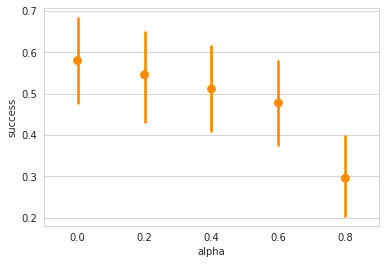

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
grouped_df["alpha"] = grouped_df["alpha"].round(1)
sns.pointplot(
    data=grouped_df, color="darkorange", y="success", x="alpha", linestyles="", dodge=0.3,  
)
plt.savefig("mimic_correlation.pdf")

In [103]:
multimodal_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha"])['auroc'].idxmax().astype(int)]
multimodal_df.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
1022,20974,2,0,0.822896,0.9,0.84,0.72,0.050431,0.088561,0.154982,0.852399,0.167553,atelectasis,atelectasis=0_cardio_group=1,1022,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
1073,20980,3,0,0.813039,0.3,0.36,0.37,0.026987,0.055472,0.106447,1.000000,0.138095,atelectasis,atelectasis=0_cardio_group=1,1073,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,mimic_multimodal
1114,20983,4,0,0.832836,0.6,0.72,0.46,0.052838,0.090020,0.156556,0.731898,0.096741,atelectasis,atelectasis=0_cardio_group=1,1114,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,mimic_multimodal
1153,20987,3,0,0.822432,0.5,0.44,0.43,0.077160,0.132716,0.191358,0.848765,0.066943,atelectasis,atelectasis=0_cardio_group=1,1153,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.6,mimic_multimodal
1193,20991,3,0,0.850673,0.3,0.32,0.22,0.078788,0.133333,0.260606,0.812121,0.036803,atelectasis,atelectasis=0_cardio_group=1,1193,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,mimic_multimodal


/tmp/ipykernel_15973/599967079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
/tmp/ipykernel_15973/599967079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df["alpha"] = multimodal_df["alpha"].round(1)


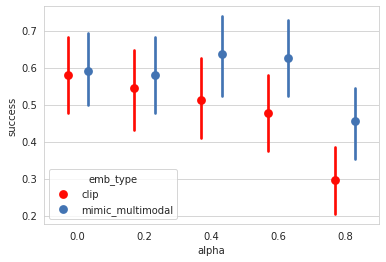

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
multimodal_df["alpha"] = multimodal_df["alpha"].round(1)
frames = [grouped_df, multimodal_df]
result = pd.concat(frames)

sns.pointplot(
    data=result, palette=["C0", "C1", "k"], hue='emb_type', color="purple", y="success", x="alpha", linestyles="", dodge=0.3,  
    
)
#sns.pointplot(
#    data=grouped_df, color="darkorange", y="success", x="alpha", linestyles="", dodge=0.3,  
#)
plt.savefig("mimic_correlation.pdf")